# Set up

In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model

Using cache found in C:\Users\mails/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-17 torch 1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# Train from scratch

In [3]:
import uuid   # Unique identifier
import os
import time

In [4]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['gun']
number_imgs = 5

In [5]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [6]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [13]:
#!cd yolov5-master && python train.py --img 320 --batch 5 --epochs 100 --data dataset.yml --weights yolov5s.pt --workers 2
!cd yolov5-master && python train.py --img 320 --batch 5 --epochs 100 --data dataset.yml --weights best.pt --workers 2

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5


train: weights=best.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=5, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-4-16 torch 1.11.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
Weights & 

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  3.11s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:09<00:00,  3.16s/it]
                 all         28         33      0.722      0.636      0.664      0.229

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/6 [00:00<?, ?it/s]
      2/99        0G   0.03895   0.01114  0.001802        12       320:   0%|          | 0/6 [00:05<?, ?it/s]
      2/99        0G   0.03895   0.01114  0.001802        12       320:  17%|#6        | 1/6 [00:05<00:28,  5.79s/it]
      2/99        0G   0.05622   0.01182  0.002471        14       320:  17%|#6        | 1/6 [00:11<00:28,  5.79s/it]
      2/99        0G   0.05622   0.01182  0.002471        14       320:  33%|###3      | 2/6 [00:11<00:22,  5.58s/it]
      2/99        0G   0.06186   0.01243  0.002779        12       320

     37/99        0G   0.08751  0.008697   0.00493         6       320:  83%|########3 | 5/6 [00:28<00:05,  5.70s/it]
     37/99        0G   0.08322  0.008108  0.004638         2       320:  83%|########3 | 5/6 [00:32<00:05,  5.70s/it]
     37/99        0G   0.08322  0.008108  0.004638         2       320: 100%|##########| 6/6 [00:32<00:00,  5.01s/it]
     37/99        0G   0.08322  0.008108  0.004638         2       320: 100%|##########| 6/6 [00:32<00:00,  5.42s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/3 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  33%|###3      | 1/3 [00:03<00:07,  3.55s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  67%|######6   | 2/3 [00:07<00:03,  3.66s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 3/3 [00:10<00:00,  3.34s/it]

     54/99        0G   0.06374   0.01224  0.005265         7       320:  67%|######6   | 4/6 [00:27<00:10,  5.43s/it]
     54/99        0G   0.06374   0.01224  0.005265         7       320:  83%|########3 | 5/6 [00:27<00:05,  5.43s/it]
     54/99        0G   0.06116   0.01197  0.004902         6       320:  83%|########3 | 5/6 [00:30<00:05,  5.43s/it]
     54/99        0G   0.06116   0.01197  0.004902         6       320: 100%|##########| 6/6 [00:30<00:00,  4.74s/it]
     54/99        0G   0.06116   0.01197  0.004902         6       320: 100%|##########| 6/6 [00:30<00:00,  5.09s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/3 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  33%|###3      | 1/3 [00:03<00:06,  3.16s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  67%|######6   | 2/3 [00:06<00:03,  3.40s/it]
               

     63/99        0G    0.0672    0.0118  0.003959        15       320:  50%|#####     | 3/6 [00:16<00:16,  5.42s/it]
     63/99        0G   0.06486   0.01134   0.00366        12       320:  50%|#####     | 3/6 [00:21<00:16,  5.42s/it]
     63/99        0G   0.06486   0.01134   0.00366        12       320:  67%|######6   | 4/6 [00:21<00:10,  5.39s/it]
     63/99        0G    0.0649   0.01153  0.003898        11       320:  67%|######6   | 4/6 [00:27<00:10,  5.39s/it]
     63/99        0G    0.0649   0.01153  0.003898        11       320:  83%|########3 | 5/6 [00:27<00:05,  5.36s/it]
     63/99        0G   0.06511   0.01117  0.004097         3       320:  83%|########3 | 5/6 [00:30<00:05,  5.36s/it]
     63/99        0G   0.06511   0.01117  0.004097         3       320: 100%|##########| 6/6 [00:30<00:00,  4.73s/it]
     63/99        0G   0.06511   0.01117  0.004097         3       320: 100%|##########| 6/6 [00:30<00:00,  5.09s/it]

               Class     Images     Labels          P  

     68/99        0G    0.0712   0.01426  0.004813         9       320:   0%|          | 0/6 [00:02<?, ?it/s]
     68/99        0G    0.0712   0.01426  0.004813         9       320:  17%|#6        | 1/6 [00:02<00:10,  2.13s/it]
     68/99        0G   0.05679   0.01243   0.00365        12       320:  17%|#6        | 1/6 [00:04<00:10,  2.13s/it]
     68/99        0G   0.05679   0.01243   0.00365        12       320:  33%|###3      | 2/6 [00:04<00:08,  2.11s/it]
     68/99        0G   0.05481   0.01212  0.003424        16       320:  33%|###3      | 2/6 [00:06<00:08,  2.11s/it]
     68/99        0G   0.05481   0.01212  0.003424        16       320:  50%|#####     | 3/6 [00:06<00:06,  2.12s/it]
     68/99        0G    0.0533   0.01264  0.003289        18       320:  50%|#####     | 3/6 [00:08<00:06,  2.12s/it]
     68/99        0G    0.0533   0.01264  0.003289        18       320:  67%|######6   | 4/6 [00:08<00:04,  2.24s/it]
     68/99        0G   0.05754   0.01272  0.003534        14    

     91/99        0G   0.05041   0.01045  0.003012         9       320:  67%|######6   | 4/6 [00:10<00:04,  2.10s/it]
     91/99        0G   0.05041   0.01045  0.003012         9       320:  83%|########3 | 5/6 [00:10<00:02,  2.10s/it]
     91/99        0G   0.04822   0.01064  0.002891         7       320:  83%|########3 | 5/6 [00:11<00:02,  2.10s/it]
     91/99        0G   0.04822   0.01064  0.002891         7       320: 100%|##########| 6/6 [00:11<00:00,  1.85s/it]
     91/99        0G   0.04822   0.01064  0.002891         7       320: 100%|##########| 6/6 [00:11<00:00,  1.98s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/3 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  33%|###3      | 1/3 [00:01<00:02,  1.27s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  67%|######6   | 2/3 [00:02<00:01,  1.33s/it]
               

# Test

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom',path='yolov5-master/runs/train/exp7/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\mails/.cache\torch\hub\master.zip
YOLOv5  2022-4-18 torch 1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [6]:
img=os.path.join('data','images','vid1-1.png')

In [7]:
results=model(img)

In [8]:
results.print()

image 1/1: 991x1753 4 guns
Speed: 109.6ms pre-process, 204.7ms inference, 14.0ms NMS per image at shape (1, 3, 384, 640)


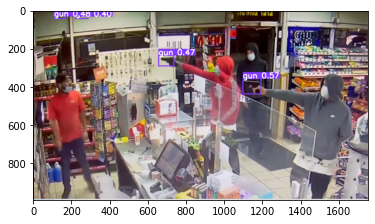

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [17]:
cap = cv2.VideoCapture('vid2.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()